In [1]:
# import libraries

import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import csv
from shapely import geometry
from shapely.geometry import Point, LineString
import numpy as np

In [2]:
# get the camera list points
# make sure camera list are put in order[top bottom or bottom up in line]
def get_camera_locations(cam_location_file):
    camera_list =dict()
    with open(cam_location_file) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                print(f'Column names are {", ".join(row)}')
                line_count += 1
            else:
                #camera_info = dict()
                point = Point(float(row[0]),float(row[1]))
                camera_list[row[2]] = point
                #camera_list.append(camera_info)
                line_count += 1
    print(f'Processed {line_count} cameras info.')
    return camera_list  

In [3]:
# download the shortest path route between the first and and last camera
# since most of cam conf liees in 4500 m so currently hardcoding disatnce to download map
def get_osm_map(cam_lowest_loc):
    graph = ox.graph_from_point((cam_lowest_loc.y,cam_lowest_loc.x), distance=4500, network_type='drive')
    ox.plot_graph(graph)
    return graph

In [4]:
# get the highest lowest value of camera id

def get_lowest_highest_cameraid(camera_list_loc):
    lowest_highest_key = []
    for key, value in camera_list_loc.items():
        lowest_highest_key.append(int(key))
    return lowest_highest_key

In [5]:
# get the shortest path route on the camera route

def get_route_of_camera(graph, org,dest):
    # Get origin x and y coordinates
    orig_xy = (org.y,org.x)
    
    # Get target x and y coordinates
    target_xy = (dest.y, dest.x)
    
    # get nearest node from the point
    orig_node = ox.get_nearest_node(graph, orig_xy)
    dest_node = ox.get_nearest_node(graph, target_xy)
    
    # Get Edges and Nodes
    nodes_proj, edges_proj = ox.graph_to_gdfs(graph, nodes=True, edges=True)
    
    # Retrieve the rows from the nodes GeoDataFrame
    o_closest = nodes_proj.loc[orig_node]
    t_closest = nodes_proj.loc[dest_node]
    
    # Create a GeoDataFrame from the origin and target points
    od_nodes = gpd.GeoDataFrame([o_closest, t_closest], geometry='geometry', crs=nodes_proj.crs)
    
    # Calculate the shortest path
    route = nx.shortest_path(G=graph, source=orig_node, target=dest_node, weight='length')
    
    # Show what we have
    print(route)
    
    # Plot the shortest path
    fig, ax = ox.plot_graph_route(graph, route, origin_point=orig_xy, destination_point=target_xy)
    
    # Get the nodes along the shortest path
    route_nodes = nodes_proj.loc[route]
    
    # Create a geometry for the shortest path
    route_line = LineString(list(route_nodes.geometry.values))
    
    return route, route_line, nodes_proj, edges_proj

Column names are X, Y, Cameraid
Processed 13 cameras info.


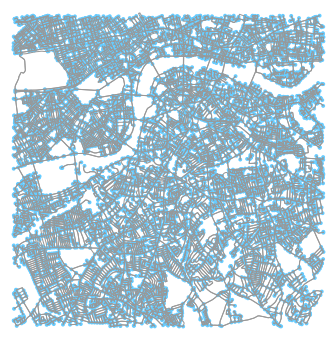

[6391501625, 6391501604, 33213267, 33213275, 33213285, 33213265, 33213252, 33213249, 110294382, 26546583, 110291494, 110287448, 26706951, 110286668, 2150883867, 111928139, 33213092, 227730, 227729, 111950921, 111951162, 2150883852, 266041030, 2592978110, 6955969355, 2592978108, 2592978113, 227722, 26706939, 32978305, 2152588369, 227715, 6956064738, 6956010509, 6956010511, 32979385, 735028678, 2576021064, 21539424, 114276908, 114277913, 114277689, 227761, 21539437, 21539428, 33776663, 33776703, 33776696, 33776689, 290017342, 33776429, 290025573, 873734149, 227771, 31922294, 290017288, 114279722, 32929401, 114280149]


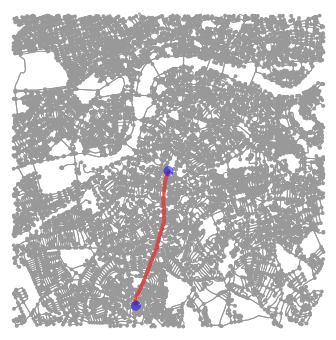

In [6]:
# get camera list
camera_list_loc = get_camera_locations('camera.csv')

# get lowest highest camera id
lowest_highest_key = get_lowest_highest_cameraid(camera_list_loc)

# min max point
min1 = str(min(lowest_highest_key))
max1 = str(max(lowest_highest_key))

# origin cam point
origin_cam_point = camera_list_loc.get(min1)

# destination cam point
dest_cam_point = camera_list_loc.get(max1)

# get the osm map on basis of camera id
graph = get_osm_map(origin_cam_point)


camera_route, route_path, nodes_proj, edges_proj = get_route_of_camera(graph, origin_cam_point,dest_cam_point)

# print route_path
#route_path

In [7]:
## THIS FUNCTION CALCULATE ROUTE LENGTH IN DEGREES

# print(route_path)
# route_path.length

# route_nodes = nodes_proj.loc[camera_route]
# # Create a GeoDataFrame
# route_geom = gpd.GeoDataFrame([[route_path]], geometry='geometry', crs=edges_proj.crs, columns=['geometry'])

# # Add a list of osmids associated with the route
# route_geom.loc[0, 'osmids'] = str(list(route_nodes['osmid'].values))

# # Calculate the route length
# route_geom['length_m'] = route_geom.length

# route_geom.head()

In [8]:
def pairs(lst):
    n = len(lst)
    for i in range(n-1):
        yield lst[i],lst[(i+1)%n]
        
def line_length(line):
    """Length of a line in meters, given in geographic coordinates

    Args:
        line: a shapely LineString object with WGS-84 coordinates

    Returns:
        Length of line in meters
    """
    from geopy.distance import distance

    return sum(distance(a, b).meters for (a, b) in pairs(line.coords))


In [9]:
print(line_length(route_path))
print(route_path)

4294.893737456048
LINESTRING (-0.1107099 51.4812977, -0.110822 51.480953, -0.1108522 51.4808695, -0.1115853 51.4797024, -0.1116473 51.4795767, -0.1117827 51.4792324, -0.1119682 51.478722, -0.1120678 51.4784409, -0.1122522 51.4777553, -0.1123995 51.4767863, -0.1124662 51.4761739, -0.1127078 51.4741058, -0.1127181 51.4738555, -0.1127499 51.4733366, -0.1127561 51.47311, -0.1127476 51.472328, -0.1127294 51.472193, -0.1125439 51.4707762, -0.1125102 51.4704235, -0.1125016 51.4700942, -0.1124782 51.469188, -0.1124697 51.4688228, -0.1128337 51.4673077, -0.1133794 51.4662998, -0.1133723 51.4662159, -0.1135696 51.4659892, -0.1139761 51.4651294, -0.1141896 51.4647238, -0.1145764 51.4638292, -0.1148312 51.4632908, -0.1150021 51.4628478, -0.1156975 51.4612386, -0.1157467 51.4611217, -0.115714 51.4610136, -0.1159057 51.4608904, -0.1167683 51.4594898, -0.1169225 51.4592421, -0.1172876 51.458638, -0.1175615 51.4581716, -0.1180884 51.4572844, -0.118439 51.4567127, -0.1188847 51.4560024, -0.1190832 51.4

In [10]:
for coord in route_path.coords:
    print(coord)


(-0.1107099, 51.4812977)
(-0.110822, 51.480953)
(-0.1108522, 51.4808695)
(-0.1115853, 51.4797024)
(-0.1116473, 51.4795767)
(-0.1117827, 51.4792324)
(-0.1119682, 51.478722)
(-0.1120678, 51.4784409)
(-0.1122522, 51.4777553)
(-0.1123995, 51.4767863)
(-0.1124662, 51.4761739)
(-0.1127078, 51.4741058)
(-0.1127181, 51.4738555)
(-0.1127499, 51.4733366)
(-0.1127561, 51.47311)
(-0.1127476, 51.472328)
(-0.1127294, 51.472193)
(-0.1125439, 51.4707762)
(-0.1125102, 51.4704235)
(-0.1125016, 51.4700942)
(-0.1124782, 51.469188)
(-0.1124697, 51.4688228)
(-0.1128337, 51.4673077)
(-0.1133794, 51.4662998)
(-0.1133723, 51.4662159)
(-0.1135696, 51.4659892)
(-0.1139761, 51.4651294)
(-0.1141896, 51.4647238)
(-0.1145764, 51.4638292)
(-0.1148312, 51.4632908)
(-0.1150021, 51.4628478)
(-0.1156975, 51.4612386)
(-0.1157467, 51.4611217)
(-0.115714, 51.4610136)
(-0.1159057, 51.4608904)
(-0.1167683, 51.4594898)
(-0.1169225, 51.4592421)
(-0.1172876, 51.458638)
(-0.1175615, 51.4581716)
(-0.1180884, 51.4572844)
(-0.118439

In [33]:
# interpolation function

# sample_points_list = [(-0.1107099, 51.4812977),(-0.110822, 51.480953)]
# sample_points_weight = [20,30]
# target_points_list =[(-0.1127561, 51.47311)]

def pairs(lst):
    n = len(lst)
    for i in range(n-1):
        yield lst[i],lst[(i+1)%n]

def calculate_distance(distance_list):
    """Length of a line in meters, given in geographic coordinates

    Args:
        line: a shapely LineString object with WGS-84 coordinates

    Returns:
        Length of line in meters
    """
    from geopy.distance import distance

    return sum(distance(a, b).meters for (a, b) in pairs(distance_list.coords))
    

def plot_osm():
    import folium
    # if interpolate value is this then color this else this
    m = ox.plot_route_folium(graph, route, route_color='green')

def interpolate(network_distance,sample_points_weight):
#     print('The network distance is ', network_distance)
#     print('The sample weightis ', sample_points_weight)
    
    numerator = []
    denominator = []
    
    for i in range(len(network_distance)-1):
        denom = pow(network_distance[i],-2)
        denominator.append(denom)
        num = pow(network_distance[i],-2)*sample_points_weight[i]
        numerator.append(num)
    
    interpolate_val = sum(numerator)/sum(denominator)
    return interpolate_val
    

def get_network_distance(sample_points_list_cam1,target_points_list):
    network_distance_dictionary = dict()
    target_increment =[]
    interpolate_value = []
    for target_points in target_points_list:
        # add the target points itertatively
        target_increment.append(target_points)
#         print('Tatget COUNTER =',target_counter)
#         target_point= target_counter+1
#         print('TARGET INCEMENT', target_increment )
#         sample_counter = 1
        network_distance = []
        for sample_points in sample_points_list_cam1:
#             print('SAMPLE COUNTER =',sample_counter)
            distance_list = []
            a = (sample_points.x, sample_points.y)
            distance_list.append(a)
            distance_list.extend(target_increment)
#             for i in distance_list:
#                 print('The DISTANCE IS ',i)
            AB = LineString(distance_list)
#             print(AB)
            distance =  calculate_distance(AB)
            network_distance.append(distance)
#         sample_counter = sample_counter+1
        network_distance_dictionary[target_points] = network_distance
    
    return network_distance_dictionary

#         interpolate_val = interpolate(network_distance,sample_points_weight_cam1)
#         interpolate_value.append(interpolate_val)
#     print('Interpolate Valune', interpolate_value )
#     print('Network DIstance Dictionary', network_distance_dictionary)
#     return interpolate_value

def idw_interpolation(sample_points_list_cam1, sample_points_weight_cam1, sample_points_list_cam2, sample_points_weight_cam2, target_points_list):
    interpolate_dictionary = dict()
    dict_cam1 = get_network_distance(sample_points_list_cam1,target_points_list)

    # reverse the target point list for camera 2
    target_points_list_rev =  target_points_list[::-1]
    dict_cam2 = get_network_distance(sample_points_list_cam2,target_points_list_rev)
    
    # merge the two dictionaries
    ds = [dict_cam1, dict_cam2]
    final_dict = {}
    for k in dict_cam1.keys():
      final_dict[k] = tuple(final_dict[k] for final_dict in ds)
    
    # update the dictionary
    for key, value in final_dict.items():
        temp_list =[]
        a = []
        for i in range(len(value)):
            a = value[i]
            temp_list.extend(a)
        
        final_dict[key] = temp_list
            
    # perform interpolation
    sample_points_weight_cam1.extend(sample_points_weight_cam2)
    
    for key, value in final_dict.items():
        interpolate_val = interpolate(value,sample_points_weight_cam1)
        interpolate_dictionary[key] = interpolate_val
    
#     print('dict_cam: ', final_dict)
#     print('interpolate_dict: ', interpolate_dictionary)

    return interpolate_dictionary


In [34]:
import numpy as np
def sample_points_within_camera_circle(cam_loc, num_points):
    # create your points
    #point_1 = geometry.Point(-0.110822, 51.480953)
    # create your circle buffer from one of the points
    distance = 0.00009
    circle_buffer = cam_loc.buffer(distance)
    min_x, min_y, max_x, max_y = circle_buffer.bounds

    points = []

    while len(points) < num_points:
        random_point = Point([np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y)])
        if (random_point.within(circle_buffer)):
            points.append(random_point)

    return points

In [35]:
def target_points(route_path, graph, cam1, cam2):
    target_point_master_list = []
    
    #print('TAGET:',cam1, cam2)
    
    for coord in route_path.coords:
        target_point_master_list.append(coord)
    
    # get the cloases node in the route from camera points
    tar1 = ox.get_nearest_node(graph, (cam1.y,cam1.x))
    dest1 = ox.get_nearest_node(graph, (cam2.y,cam2.x))
    t_closest1 = nodes_proj.loc[tar1]
    t_closest2 = nodes_proj.loc[dest1]
    
    # convert the location to tuples
    a = (t_closest1.x, t_closest1.y)
    b = (t_closest2.x, t_closest2.y)
    
    # get the index from the target master list
    target_index = []
    for item in target_point_master_list:
        if item == a:
            #print ("OK")
            target_index.append(target_point_master_list.index(a))
            #print(target_point_master_list.index(a))
        if item == b:
            #print ("OK_b")
            target_index.append(target_point_master_list.index(b))
    
    target_points_cam1_cam2 = target_point_master_list[target_index[0]:target_index[1]]
    return target_points_cam1_cam2
    


In [36]:
# function to rad from data file for speed and count

# import pandas as pd
# from statistics import mean
# import matplotlib.pyplot as plot

# def read_car_count_speed(i):

#     # reading csv file  
#     file = pd.read_csv("C:\\PhD Docs\\OSM Traffic\\data\\original data\\data2.csv")

#     cam_name =[]
#     cam_info =[]
    
#     if i == 13:
#         print('do nothing')
#     else:
#         incoming_objects_speed =[]
#         outgoing_objects_speed =[]

#         b = file.loc[file['Camera_no'] == 'Camera'+str(i)]
#         for index, row in b.iterrows():
#             if row["direction"] == 'incoming':
#                 incoming_objects_speed.append(row["speed"])
#                 #print(row["direction"], row["speed"])
#             else:
#                 outgoing_objects_speed.append(row["speed"])
#         if len(incoming_objects_speed) ==0:
#             tup_info = (0,len(outgoing_objects_speed),0,outgoing_objects_speed)
#             #cam_info.append(tup_info)
#         if len(outgoing_objects_speed) ==0:
#             tup_info = (len(incoming_objects_speed),0,incoming_objects_speed,0)
#             #cam_info.append(tup_info)
#         else:
#             tup_info = (len(incoming_objects_speed),len(outgoing_objects_speed),incoming_objects_speed,outgoing_objects_speed)
#             cam_name.append('Camera'+str(i))
#             cam_info.append(tup_info)
#     return cam_info

In [111]:
# calculate the latency of the function
from datetime import datetime
import folium
from folium.features import ColorLine
import branca
import branca.colormap as cm
import random
import vincent, json

now = datetime.now()

# get pairs
def pairs1(lst):
    n = len(lst)
    main = []
    for i in range(n-1):
        sub_main = []
        sub_main.append(lst[i])
        sub_main.append(lst[(i+1)%n])
        main.append(sub_main)
    return main
        #yield lst[i],lst[(i+1)%n]

# get interpolate value from dictionary from colormap
def check_interpolate_dict_value(tuple_val,interpolate_value):
    swap_tuple = (tuple_val[1],tuple_val[0])
    interpolate_num = interpolate_value.get(swap_tuple)
    return interpolate_num , swap_tuple
    #print('INterpolation VALUE:', interpolate_num)
    

def generate_random_speed(count):
    #Generate count random numbers between 10 and 30
    randomlist = random.sample(range(0, 60), count)
    #randomlist = [random.randrange(10, 45) for _ in range(count)]
    return randomlist

    
def plot_interpolate_traffic_congestion(cam1,cam2, cam1_vehicle_count, cam2_vehicle_count,
                                        cam1_veh_speed_list,cam2_veh_speed_list,target_points):
    
    sample_point_cam1 = sample_points_within_camera_circle(cam1, cam1_vehicle_count)
    sample_point_cam2 = sample_points_within_camera_circle(cam2, cam2_vehicle_count)
    
#     print('Sample Point1:', len(sample_point_cam1))
#     print('Sample Point2:', len(sample_point_cam2))
#     print('TARGET POINT:', target_points)
#     print('CAM1_SPEED:', len(cam1_veh_speed_list))
#     print('CAM2_SPEED:', len(cam2_veh_speed_list))
    
    
    interpolate_value = idw_interpolation(sample_point_cam1, cam1_veh_speed_list, sample_point_cam2, cam2_veh_speed_list, target_points)
    cam_start_loc = (cam1.x, cam1.y)
    final_target_loc = [cam_start_loc]
    final_target_loc.extend(target_points)

    res = [(sub[1], sub[0]) for sub in final_target_loc]

    res1 = pairs1(res)
    
    return interpolate_value, res1


def add_popup_folium(cam1_veh_speed_list):
    scatter_chart = vincent.Bar(cam1_veh_speed_list,width=200,
               height=150).axis_titles(x='Vehicle Number', y='Speed(km/hr)')
    # Let's convert it to JSON.
    scatter_json = scatter_chart.to_json()
    # Let's create a Vega popup based on scatter_json.
    popup = folium.Popup(max_width=800)
    folium.Vega(scatter_json, height=200, width=250).add_to(popup)
    return popup


# load the OSM map and color map    
#colormap = cm.LinearColormap(colors=['red','green'], index=[10,50],vmin=10,vmax=50)

colormap = cm.StepColormap(colors=['brown','red', 'orange', 'green'], index=[1,8,20,35,50], vmin=1.0, vmax=50.0, caption='Congestion')

# temporary fix

cam_mid = camera_list_loc.get('1')

m = folium.Map(location= (cam_mid.y, cam_mid.x), zoom_start=12,tiles='OpenStreetMap')

m.add_child(colormap)


# iterate camera list for interpolation
for key in range(len(camera_list_loc)):
    print(key)
    if key<(len(camera_list_loc)-1):
        cam1 = camera_list_loc.get(str(key+1))
        cam2 = camera_list_loc.get(str(key+2))
        #print('CAMERAS:', cam1,cam2)
        
        # for now generating dummy data
        # this will be replaced with the values coming from object detector function
        cam1_vehicle_count = random.randint(1,10)
        cam2_vehicle_count = random.randint(1,10)
        #print(cam1_vehicle_count)
        # replace this with speed calculation functiom
        cam1_veh_speed_list = generate_random_speed(cam1_vehicle_count)
        cam2_veh_speed_list = generate_random_speed(cam2_vehicle_count)
                
        #get the target points between cam1 and cam2
        target_points_new = target_points(route_path, graph, cam1, cam2)
        
        # get the data interpolate data
        interpolate_value, res1 = plot_interpolate_traffic_congestion(cam1,cam2, cam1_vehicle_count, cam2_vehicle_count, cam1_veh_speed_list,
                                            cam2_veh_speed_list,target_points_new)
        
        # plot the interpolate data
        for i in (range(len(res1))):
            interpolate_num, swap_tuple = check_interpolate_dict_value(res1[i][1],interpolate_value)
            cl1 = folium.ColorLine(res1[i],
                         colors = [0],
                         colormap = [ colormap(interpolate_num)[:7],'green'],
                         weight = 7,
                         opacity = 1,
                        overlay=True,
                        name= 'camera_location_congestion_status'+str(swap_tuple) ).add_to(m)
            m.add_child(cl1)
        
#         cl2= folium.Marker([cam1.y,cam1.x], popup= add_popup_folium(cam1_veh_speed_list), overlay=True, name='VehicleC0unt').add_to(m)
#         cl3= folium.Marker([cam1.y,cam1.x], popup= add_popup_folium(cam1_veh_speed_list), overlay=True, name='VehicleC0unt').add_to(m)
#         m.add_child(cl2).add_child(cl3)


m.add_child(folium.map.LayerControl())


# cam1 = camera_list_loc.get('1')
# cam2 = camera_list_loc.get('2')
# print(cam1,cam2)

# sample_point_cam1 = sample_points_within_camera_circle(cam1, 5)
# sample_point_cam2 = sample_points_within_camera_circle(cam2, 5)

# sample_point_weight_cam1 = [50,50,55,24,30]
# sample_point_weight_cam2 = [32,31,25,29,40]

# target_points = target_points(route_path, graph, cam1, cam2)

# interpolate_value = idw_interpolation(sample_point_cam1,sample_point_weight_cam1,sample_point_cam2,sample_point_weight_cam2,target_points)


# cam_start_loc = (cam1.x, cam1.y)
# final_target_loc = [cam_start_loc]
# final_target_loc.extend(target_points)

# res = [(sub[1], sub[0]) for sub in final_target_loc]

# res1 = pairs1(res)

# print(res1)


# colormap = cm.LinearColormap(colors=['red','green'], index=[10,50],vmin=10,vmax=50)

# m = folium.Map(location= (cam1.y, cam1.x), zoom_start=12,tiles='OpenStreetMap')

# for i in (range(len(res1))):
#     interpolate_num = check_interpolate_dict_value(res1[i][1],interpolate_value)
#     folium.ColorLine(res1[i],
#                  colors = [0],
#                  colormap = [ colormap(interpolate_num)[:7],'green'],
#                  weight = 10,
#                  opacity = 1).add_to(m)
    
# m.add_child(colormap)

later = datetime.now()

difference = (later - now).total_seconds()

print('The time difference is ',difference)

m

#m.save('C:\\PhD Docs\\OSM Traffic\\data\\original data\\map.html')
#print('SAVED')




0
1
2
3
4
5
6
7
8
9
10
11
The time difference is  1.809523


In [110]:
m.save('C:\\PhD Docs\\OSM Traffic\\data\\original data\\map6.html')

In [72]:
import vincent, json
scatter_chart = vincent.Bar([10, 20, 30, 20, 15, 30, 45],width=200,
               height=150).axis_titles(x='Weekday', y='Pings')

scatter_line = vincent.Line([10, 20, 30, 20, 15, 30, 45],width=200,
               height=150).axis_titles(x='Weekday', y='Pings')

# Let's convert it to JSON.
scatter_json = scatter_chart.to_json()

line_json = scatter_line.to_json()

# Let's convert it to dict.
scatter_dict = json.loads(scatter_json)

m = folium.Map([43,-100], zoom_start=4)

# Let's create a Vega popup based on scatter_json.
popup = folium.Popup(max_width=800)
folium.Vega(scatter_json, height=200, width=250).add_to(popup)
#folium.Vega(line_json, height=200, width=250).add_to(popup)
folium.Marker([30,-100], popup=popup).add_to(m)

m

In [431]:
cam1 = camera_list_loc.get('1')
print(cam1)

POINT (-0.11065 51.4812)


In [427]:
# def get_color(val):
#     valitudes = {
#         0: '#0000FF',
#         800: '#0040FF',
#         900: '#0080FF',
#         1000: '#00FFB0',
#         1100: '#00E000',
#         1200: '#80FF00',
#         1300: '#FFFF00',
#         1400: '#FFC000',
#         1500: '#FF0000',
#     }
#     first = -1
#     for valitude in valitudes.keys():
#         if first < val <= valitude:
#             return valitudes[valitude]
#         first = valitude
#     return '#FF0000'

In [407]:
# import folium
# from folium.features import ColorLine
# import branca
# import branca.colormap as cm

# m = folium.Map(location= (cam1.y, cam1.x), zoom_start=12,tiles='OpenStreetMap')
# m

# for k in range(len(points)-1):
#     color = get_color(points[k]['alt'])
#     ColorLine(
#         [
#             [points[k]['lat'], points[k]['lng']],
#             [points[k+1]['lat'], points[k+1]['lng']],
#         ],
#         colors=[1],
#         colormap=[color, color],
#         weight=3,
#     ).add_to(m)

# m.fit_bounds(m.get_bounds())

In [408]:
# print(len(target_points))
#print(target_points)
# print(len(interpolate_value))

# import branca
# import branca.colormap as cm
# route_list_interpolate = []
# for i in (range(len(target_points))):
#     sub_route_interpolate = []
#     sub_route_interpolate.append(target_points[i][1])
#     sub_route_interpolate.append(target_points[i][0])
#     sub_route_interpolate.append(interpolate_value[i])
#     route_list_interpolate.append(sub_route_interpolate)
    
# #print(route_list)

# points = pd.DataFrame(route_list_interpolate, columns=['lat','long','interpolation'])

# colormap = cm.LinearColormap(colors=['red','lightblue'], index=[10,100],vmin=10,vmax=100)

# m = folium.Map(location= (cam1.y, cam1.x), zoom_start=12,tiles='OpenStreetMap')

# #folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(my_map)

# lat = list(df.latitude)
# lon = list(df.longitude)
# pow1 = list(df.interpolation)

# for loc, p in zip(zip(lat, lon), pow1):
#     print('the value of p', p)
#     folium.Circle(
#         location=loc,
#         radius=10,
#         fill=True,
#         color=colormap(p),
#         #fill_opacity=0.7
#     ).add_to(map)
# map.add_child(colormap)

# folium.ColorLine(
#         positions = segments, # tuple of coordinates 
#         colors = speed, # map each segment with the speed 
#         colormap =  colormap, # map each value with a color 
#         ).add_to(base)

# print(lat[0])

# for k in range(len(points)-1):
#     #color = get_color(points[k]['interpolation'])
#     ColorLine(
#         [
#             [points[k]['lat'], points[k]['long']],
#             [points[k+1]['lat'], points[k+1]['long']],
#         ],
#         colors=[1],
#         #colormap=[color, color],
#         weight=3,
#     ).add_to(m)

# m
    
    

In [416]:
import folium
from folium.features import ColorLine
import branca
import branca.colormap as cm

    
cam_start_loc = (cam1.x, cam1.y)
final_target_loc = [cam_start_loc]
final_target_loc.extend(target_points)

res = [(sub[1], sub[0]) for sub in final_target_loc]

res1 = pairs1(res)

print(res1)


colormap = cm.LinearColormap(colors=['red','green'], index=[10,50],vmin=10,vmax=50)

m = folium.Map(location= (cam1.y, cam1.x), zoom_start=12,tiles='OpenStreetMap')

for i in (range(len(res1))):
    interpolate_num = check_interpolate_dict_value(res1[i][1],interpolate_value)
    folium.ColorLine(res1[i],
                 colors = [0],
                 colormap = [ colormap(interpolate_num)[:7],'green'],
                 weight = 10,
                 opacity = 1).add_to(m)
    
m.add_child(colormap)
    
 
m

[[(51.4812, -0.11065), (51.4812977, -0.1107099)], [(51.4812977, -0.1107099), (51.480953, -0.110822)], [(51.480953, -0.110822), (51.4808695, -0.1108522)], [(51.4808695, -0.1108522), (51.4797024, -0.1115853)], [(51.4797024, -0.1115853), (51.4795767, -0.1116473)], [(51.4795767, -0.1116473), (51.4792324, -0.1117827)], [(51.4792324, -0.1117827), (51.478722, -0.1119682)]]


In [315]:
print(colormap(80))

#386300ff


In [409]:
print(interpolate_value)

{(-0.1107099, 51.4812977): 40.30035150611398, (-0.110822, 51.480953): 41.556157461421286, (-0.1108522, 51.4808695): 41.64001589335503, (-0.1115853, 51.4797024): 43.55360318695515, (-0.1116473, 51.4795767): 43.826276295819376, (-0.1117827, 51.4792324): 44.49434971523641, (-0.1119682, 51.478722): 45.3757745153006}
